**Solución de ecuaciones diferenciales ordinarias con python**

**Ejercicio 1.** Resuelva la ecuación diferencial del oscilador de Van der Pol

$$\frac{d^2x}{dt^2}-\mu(1-x^2)\frac{dx}{dt}+x=0$$

donde $x$ es la posición y $\mu$ es un parámetro de la parte no lineal.

Resuelva el caso para $\mu = 0, 1, 2, 3, 4$ y grafique las soluciones para un tiempo de integración de t = [0, 50]

In [3]:
# Bibliotecas a utilizar
import numpy as np
import matplotlib.pyplot as plt

from scipy.integrate import odeint

from scipy.integrate import solve_ivp, odeint

In [4]:
from scipy.integrate import odeint

def pendulo(y, t, u):
        x, v = y
        dydt = [v, u*v - u*x**2*v-x]
        return dydt

# Definimos el tiempo de integración de 0 a 50 segundos (5001 puntos, h=0.01)
t = np.linspace(0, 50, 5001)

# Definimos las condiciones iniciales x=0.3, e y = 0 (el péndulo se "suelta")
y0 = [0.3, 0.0]

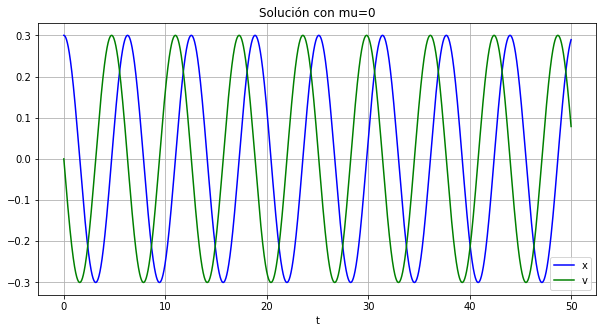

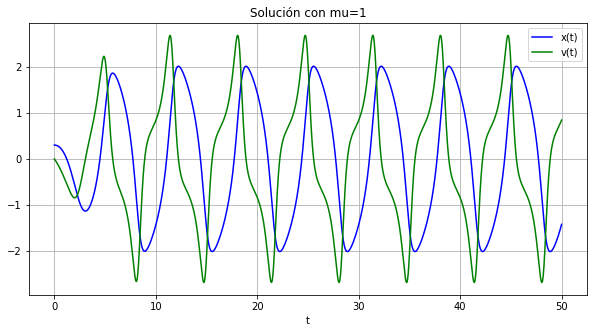

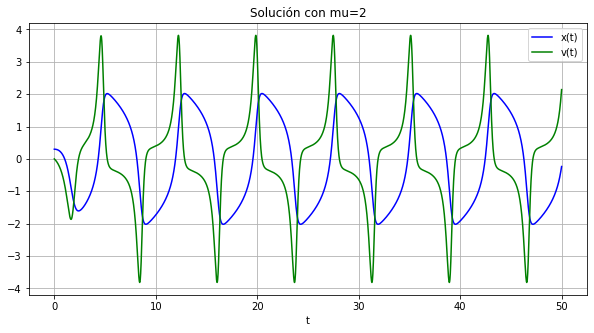

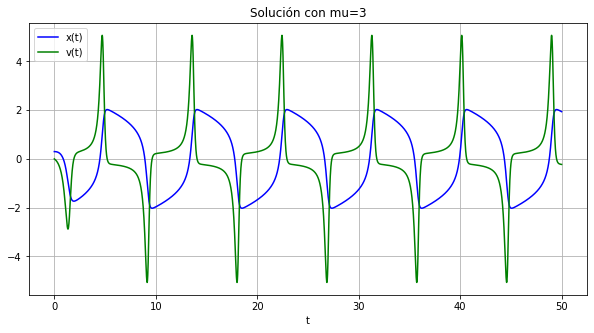

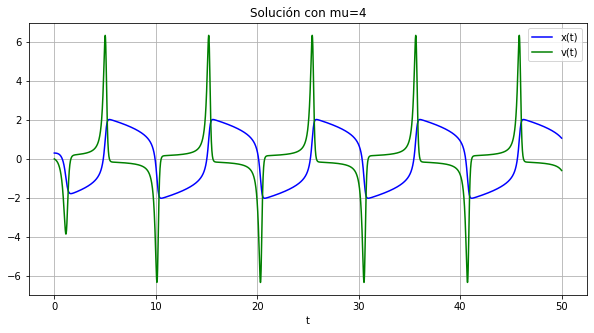

In [8]:
#U=0
u = 0.0

y = odeint(pendulo, y0, t, args=(u,))

plt.figure(figsize=(10,5))
plt.plot(t, y[:, 0], 'b', label='x')
plt.plot(t, y[:, 1], 'g', label='v')
plt.legend(loc='best')
plt.title('Solución con mu=0')
plt.xlabel('t')
plt.grid()
plt.show()

#U=1
u = 1.0

y = odeint(pendulo, y0, t, args=(u,))

plt.figure(figsize=(10,5))
plt.plot(t, y[:, 0], 'b', label='x(t)')
plt.plot(t, y[:, 1], 'g', label='v(t)')
plt.legend(loc='best')
plt.title('Solución con mu=1')
plt.xlabel('t')
plt.grid()
plt.show()

#U=2
u = 2.0

y = odeint(pendulo, y0, t, args=(u,))

plt.figure(figsize=(10,5))
plt.plot(t, y[:, 0], 'b', label='x(t)')
plt.plot(t, y[:, 1], 'g', label='v(t)')
plt.legend(loc='best')
plt.title('Solución con mu=2')
plt.xlabel('t')
plt.grid()
plt.show()

#U=3
u = 3.0

y = odeint(pendulo, y0, t, args=(u,))

plt.figure(figsize=(10,5))
plt.plot(t, y[:, 0], 'b', label='x(t)')
plt.plot(t, y[:, 1], 'g', label='v(t)')
plt.legend(loc='best')
plt.title('Solución con mu=3')
plt.xlabel('t')
plt.grid()
plt.show()

#U=4
u = 4.0

y = odeint(pendulo, y0, t, args=(u,))

plt.figure(figsize=(10,5))
plt.plot(t, y[:, 0], 'b', label='x(t)')
plt.plot(t, y[:, 1], 'g', label='v(t)')
plt.legend(loc='best')
plt.title('Solución con mu=4')
plt.xlabel('t')
plt.grid()
plt.show()

**Ejercicio 2.** Siguiendo con el ejemplo anterior del oscilador de Van de Pol, reproduce la gráfica del plano fase ($\theta, \omega$) que aparece en la Wikipedia para distintos valores de $\mu$ y se reproduce abajo.

No handles with labels found to put in legend.


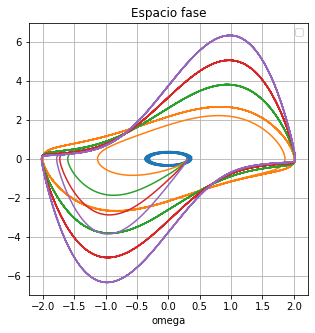

In [9]:
#U=0
u = 0.01

mu0 = odeint(pendulo, y0, t, args=(u,))

#U=1
u = 1.0

mu1 = odeint(pendulo, y0, t, args=(u,))

#U=2
u = 2.0

mu2 = odeint(pendulo, y0, t, args=(u,))

#U=3
u = 3.0

mu3 = odeint(pendulo, y0, t, args=(u,))

#U=4
u = 4.0

mu4 = odeint(pendulo, y0, t, args=(u,))

plt.figure(figsize=(5,5))
plt.plot(mu0[:,0], mu0[:, 1], mu1[:,0], mu1[:,1], mu2[:,0], mu2[:,1], mu3[:,0], mu3[:,1], mu4[:,0], mu4[:,1] )
plt.legend(loc='best')
plt.title('Espacio fase')
plt.xlabel('omega')
plt.grid()
plt.show()

**Ejercicio 3.** Encuentre las soluciones de las siguientes Ecuaciones Diferenciales Ordinarias, utilizando los siguientes métodos:

* Método de Euler
* Método de Runge-Kutta RK4
* Función scipy.integrate.odeint ó scipy.integrate-solve_ivp

**Ejercicio 3.1.**

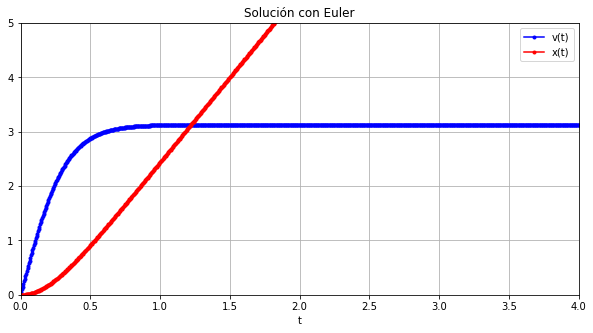

In [12]:
# Usando Euler
# condiciones iniciales
t = np.linspace(0, 10, 2001)
t0 = 0
x0 = 0
v0 = 0
k = 1
g = 9.81

# definiendo v=dx/dt tenemos dos ecuaciones

f = lambda v,t: -k*v**2 + g 
v = np.zeros(len(t))
v[0] = v0
    
for n in range(0,len(t)-1):
  v[n+1] = v[n] + f(v[n],t[n])*(t[n+1] - t[n])

# y la segunda

x = np.zeros(len(t))
x[0] = x0
    
for n in range(0,len(t)-1):
  x[n+1] = x[n] + v[n]*(t[n+1] - t[n])

plt.figure(figsize=(10,5))
plt.plot(t,v,'b.-', t,x,'r.-')
plt.legend(['v(t)', 'x(t)'])
plt.title('Solución con Euler')
plt.axis([0,4,0,5])
plt.grid()
plt.xlabel('t')
plt.show()

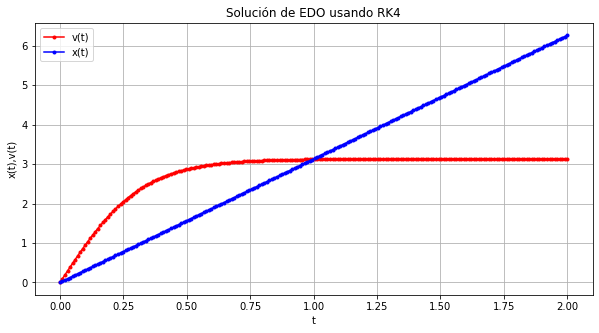

In [14]:
# Por el método Runge-Kutta 4to orden

"""Four_Step_Runge_Kutta_ODE1.py 

Implementation of the classic fourth-order method also refered as the
"original" Runge–Kutta method. This method is an implicit four step
Runge-Kutta method which solves an intial value problem numerically. 
"""

from datetime import datetime
import matplotlib.pyplot as plt
from math import exp, sqrt 

__date__ = datetime(2019, 6, 6)
__author__ = "Joshua Simon"


def runge_kutta(f, x_0, y_0, h):
    """Four step Runge-Kutta method (RK4)
    Solves first order ODEs
    """
    k_0 = f(x_0, y_0)
    k_1 = f(x_0 + h/2, y_0 + h/2 * k_0)
    k_2 = f(x_0 + h/2, y_0 + h/2 * k_1)
    k_3 = f(x_0 + h, y_0 + h * k_2)

    k = 1/6 * (k_0 + 2.0*k_1 + 2.0*k_2 + k_3)

    x_1 = x_0 + h
    y_1 = y_0 + h * k

    return x_1, y_1

# Definimos la parte de la ecuación para la velocidad
def f(t, v):
    return (-k*v**2+g)

# Condiciones iniciales
t_0 = 0.0
y_0 = 0.0

# Paso de integración h
a = 0
b = 2.0 
Npts = 201
h = (b-a)/Npts

t_values = [t_0]
y_values = [y_0]

# Calcula la solución con RK4
t = t_0
y = y_0

for _ in range(Npts):
  t, y = runge_kutta(f, t, y, h)
  t_values.append(t)
  y_values.append(y)

# Definimos la parte derecha de la ecuación para la posicion
def f(T, x):
    return (y)

# Condiciones iniciales
T_0 = 0.0
x_0 = 0.0

# Paso de integración h
a = 0
b = 2.0 
Npts = 201
h = (b-a)/Npts

T_values = [T_0]
x_values = [x_0]

# Calcula la solución con RK4
T = T_0
x = x_0

for _ in range(Npts):
  T, x = runge_kutta(f, T, x, h)
  T_values.append(T)
  x_values.append(x)


plt.figure(figsize=(10,5))
plt.plot(t_values,y_values,'r.-', label='v(t)')
plt.plot(T_values,x_values,'b.-', label='x(t)')
plt.legend()
plt.grid()
plt.title("Solución de EDO usando RK4")
plt.xlabel('t')
plt.ylabel('x(t),v(t)')
plt.show()

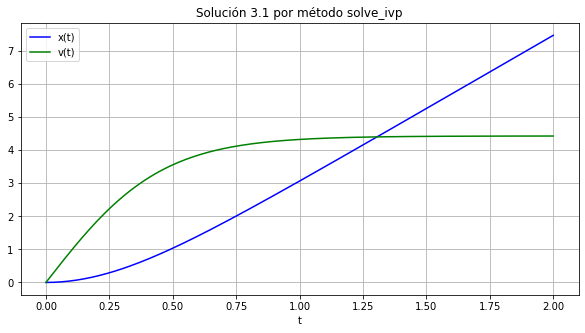

In [15]:
# Usando la librería scipy con la función scipy.integrate.odeint
# definimos la función F de la ecuación.
def ed3(t,y,k):
      dydt = [y[1], - k*y[1]**2 + g ]
      return dydt

# Paso de integración h = (tmax-t0)/Npts
t0=0
tmax=2.0
Npts=201

# Condiciones iniciales
# Definimos el coeficiente mu
k=0.5

# Definimos las condiciones iniciales 
t_0 = 0.0
y_0 = [0.0, 0.0]

# Definimos el tiempo de integración de 0 a 10 segundos (101 puntos, h=0.1)
t = np.linspace(t0,tmax,Npts)

abserr = 1.0e-8
relerr = 1.0e-6

sol = solve_ivp(lambda t, y, mu: ed3(t, y, k),(t0,tmax), y0=y_0, method='RK45', t_eval=t, args=(k,), rtol=relerr, atol=abserr)
#print(sol)

# La solución regresa ambas x(t) y v(t)
y1=sol.y[0]
y2=sol.y[1]

plt.figure(figsize=(10,5))
plt.plot(t, y1, 'b', label='x(t)')
plt.plot(t, y2, 'g', label='v(t)')
plt.legend(loc='best')
plt.title('Solución 3.1 por método solve_ivp')
plt.xlabel('t')
plt.grid()
plt.show()

**Ejercicio 3.2.**

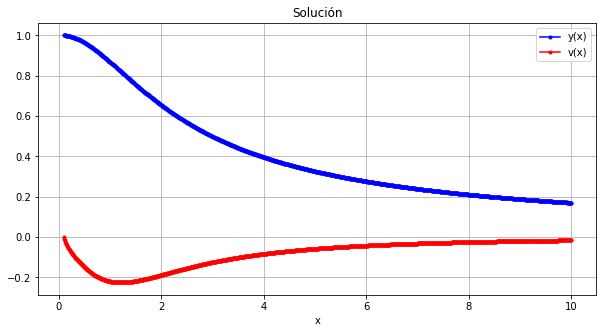

In [16]:
# Por el método de Euler y Runge Kutta no se puede debido al término 2/x

# Usando la librería scipy con la función scipy.integrate.odeint

def ED2(x2, x):
        y, v = x2
        dx2dx = [v, -(2/x)*v -y**5]
        return dx2dx

x0 = 0.1
y0 = 1.0
v0 = 0
x = np.linspace(0.1, 10, 1001) ## Con x=0 no hay solución al menos por este método

# Definimos las condiciones iniciales 
x_0 = x0
x2_0 = [y0, v0]

# Los errores máximos deseados
abserr = 1.0e-8
relerr = 1.0e-6

sol = odeint(ED2, x2_0, x, atol=abserr, rtol=relerr)

# La solución 
y1=sol[:,0]
y2=sol[:,1]

plt.figure(figsize=(10,5))
plt.plot(x, y1, 'b.-', label='y(x)')
plt.plot(x, y2, 'r.-', label='v(x)')
plt.legend(loc='best')
plt.title('Solución')
plt.xlabel('x')
plt.grid()
plt.show()

**Ejercicio 3.3.**

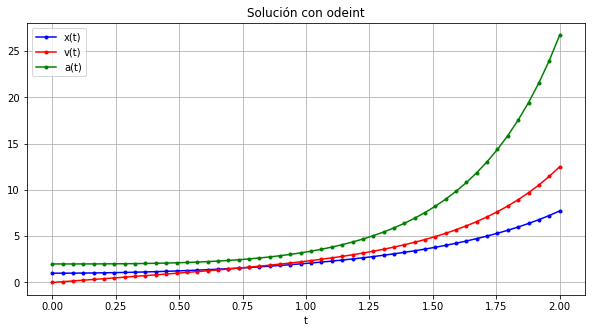

In [17]:
# Usando la librería scipy con la función scipy.integrate.odeint

def ED3(Q, x):
        y, v, a = Q
        dbdx = [v, a, (x-1)**2 + y**2 + v - 2]
        return dbdx

x0 = 0.0
y0 = 1.0
v0 = 0.0
a0 = 2.0
x = np.linspace(0.0, 2.0, 50)

# Definimos las condiciones iniciales 
x_0 = x0
a_0 = [y0, v0, a0]

# Definimos los errores de tolerancia para la solución
abserr = 1.0e-8
relerr = 1.0e-6

sol=odeint(ED3, a_0, x, atol=abserr, rtol=relerr)
#print(t)
#print(sol[:,0],sol[:,1])

# La solución regresa ambas x(t) y v(t)
y1=sol[:,0]
y2=sol[:,1]
y3=sol[:,2]

plt.figure(figsize=(10,5))
plt.plot(x, y1, 'b.-', label='x(t)')
plt.plot(x, y2, 'r.-', label='v(t)')
plt.plot(x, y3, 'g.-', label='a(t)')
plt.legend(loc='best')
plt.title('Solución con odeint')
plt.xlabel('t')
plt.grid()
plt.show()